
REGISTRO MENSAL DE ATENDIMENTOS DOS CRAS (RMA) – FORMULÁRIO DO CRAS

Variáveis do Bloco II – Atendimentos individualizados realizados no CRAS

C1 = Quantidade total de atendimentos particularizados realizados no CRAS no mês de referência


Código para baixar os endereços dos arquivos na página

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pickle
import os
import plotly.io as pio
import math
from geojson_rewind import rewind

import streamlit as st

In [2]:
url='https://aplicacoes.mds.gov.br/sagi/dicivip_datain/ckfinder/userfiles/files/RMA_CRAS_Criterios_2022_divulga%C3%A7%C3%A3o_27_03_23.xlsx'

In [3]:
tabelafinal = pd.read_excel(url,sheet_name="Base tratada")

In [4]:
tabelafinal.head(2)

,data,mes_referencia,ano,mes,nome_unidade,NU_IDENTIFICADOR,endereco,municipio,uf,a1,...,d2_original,d3_original,d4_original,d5_original,d6_original,d7_original,d8_original,geral,Ind_duplicidade,trimestre
0,2022-01-01,01-01-2022,2022,1,'CRAS CENTRO DE REFERENCIA DE ASSISTENCIA SOCIAL','11000120396','RUA MARANHAO 3300 - PRINCESA ISABEL','ALTA FLORESTA DOESTE','RO',30.0,...,0,0,0,0,0,0,0,1,Caso principal,1
1,2022-02-01,01-02-2022,2022,2,'CRAS CENTRO DE REFERENCIA DE ASSISTENCIA SOCIAL','11000120396','RUA MARANHAO 3300 - PRINCESA ISABEL','ALTA FLORESTA DOESTE','RO',51.0,...,0,0,0,90,31,0,0,1,Caso principal,1


In [5]:
tabelafinal.columns

Index(['data', 'mes_referencia', 'ano', 'mes', 'nome_unidade',
       'NU_IDENTIFICADOR', 'endereco', 'municipio', 'uf', 'a1', 'a2', 'b1',
       'b2', 'b3', 'b4', 'b5', 'b6', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'd1',
       'd2', 'd3', 'd4', 'd5', 'd6', 'd7', 'IBGE', 'c7', 'c8', 'c9', 'd8',
       'IBGE7', 'Nome_UF', 'Região', 'Município', 'Pop_total_2010',
       'Pop_Urbana2010', 'Pop_Rural2010', 'areaKm2', 'Porte_pop2010',
       'a1_original', 'a2_original', 'b1_original', 'b2_original',
       'b3_original', 'b4_original', 'b5_original', 'b6_original',
       'c1_original', 'c2_original', 'c3_original', 'c4_original',
       'c5_original', 'c6_original', 'c7_original', 'c8_original',
       'c9_original', 'd1_original', 'd2_original', 'd3_original',
       'd4_original', 'd5_original', 'd6_original', 'd7_original',
       'd8_original', 'geral', 'Ind_duplicidade', 'trimestre'],
      dtype='object')

In [6]:
RMA_mensal=tabelafinal.loc[:,['ano', 'mes', 'Município', 'uf', 'c1', 'IBGE','IBGE7']]

In [7]:
RMA_mensal.head(5)

,ano,mes,Município,uf,c1,IBGE,IBGE7
0,2022,1,Alta Floresta D'Oeste,'RO',1218.0,110001,1100015
1,2022,2,Alta Floresta D'Oeste,'RO',1280.0,110001,1100015
2,2022,3,Alta Floresta D'Oeste,'RO',1006.0,110001,1100015
3,2022,4,Alta Floresta D'Oeste,'RO',1116.0,110001,1100015
4,2022,5,Alta Floresta D'Oeste,'RO',1442.0,110001,1100015


In [8]:
RMA_mensal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99154 entries, 0 to 99153
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ano        99154 non-null  int64  
 1   mes        99154 non-null  int64  
 2   Município  99154 non-null  object 
 3   uf         99154 non-null  object 
 4   c1         96827 non-null  float64
 5   IBGE       99154 non-null  int64  
 6   IBGE7      99154 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 5.3+ MB


In [9]:
RMA_m_2022=RMA_mensal[(RMA_mensal['ano']==2022)]

In [10]:
RMA_2022_0=RMA_m_2022.groupby(['ano','mes','Município','uf','IBGE','IBGE7']).sum().reset_index()

In [11]:
RMA_2022_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64010 entries, 0 to 64009
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ano        64010 non-null  int64  
 1   mes        64010 non-null  int64  
 2   Município  64010 non-null  object 
 3   uf         64010 non-null  object 
 4   IBGE       64010 non-null  int64  
 5   IBGE7      64010 non-null  int64  
 6   c1         64010 non-null  float64
dtypes: float64(1), int64(4), object(2)
memory usage: 3.4+ MB


Fixar Colunas de soma_c1 e media_c1

In [12]:
RMA_2022_soma=RMA_2022_0.groupby(['ano','Município','uf','IBGE','IBGE7']).sum().reset_index()
RMA_2022_soma=RMA_2022_soma.rename(columns={'c1':'soma_c1'}).drop(columns={'mes'})
RMA_2022_media=RMA_2022_0.groupby(['ano','Município','uf','IBGE','IBGE7']).mean().round(1).reset_index()
RMA_2022_media=RMA_2022_media.rename(columns={'c1':'media_c1' }).drop(columns={'mes'})

In [13]:
RMA_2022_media.head(2)

,ano,Município,uf,IBGE,IBGE7,media_c1
0,2022,Abadia de Goiás,'GO',520005,5200050,623.6
1,2022,Abadia dos Dourados,'MG',310010,3100104,120.1


In [14]:
RMA_2022_soma.head(2)

,ano,Município,uf,IBGE,IBGE7,soma_c1
0,2022,Abadia de Goiás,'GO',520005,5200050,6860.0
1,2022,Abadia dos Dourados,'MG',310010,3100104,1441.0


In [15]:
RMA_2022=pd.merge(RMA_2022_soma,RMA_2022_media, how = 'inner', 
                  right_on=['ano', 'Município','IBGE7','IBGE','uf'],
                  left_on=['ano', 'Município','IBGE7','IBGE','uf'])
RMA_2022.head(2)

,ano,Município,uf,IBGE,IBGE7,soma_c1,media_c1
0,2022,Abadia de Goiás,'GO',520005,5200050,6860.0,623.6
1,2022,Abadia dos Dourados,'MG',310010,3100104,1441.0,120.1


In [16]:
RMA_2022[(RMA_2022['IBGE']==530010)]

,ano,Município,uf,IBGE,IBGE7,soma_c1,media_c1
709,2022,Brasília,'DF',530010,5300108,300262.0,27296.5


Encontrar número máximo de CRAS

In [17]:
RMA_m_2022_CRAS=tabelafinal.loc[:,['ano', 'mes', 'Município','NU_IDENTIFICADOR', 'uf', 'IBGE','IBGE7']]
RMA_m_2022_CRAS=RMA_m_2022_CRAS[(RMA_m_2022_CRAS['ano']==2022)]
RMA_m_2022_CRAS.head(2)

,ano,mes,Município,NU_IDENTIFICADOR,uf,IBGE,IBGE7
0,2022,1,Alta Floresta D'Oeste,'11000120396','RO',110001,1100015
1,2022,2,Alta Floresta D'Oeste,'11000120396','RO',110001,1100015


In [18]:
RMA_m_2022_CRAS=RMA_m_2022_CRAS.groupby(['ano','mes','Município','uf','IBGE','IBGE7'])['NU_IDENTIFICADOR'].agg(['count']).reset_index()
RMA_m_2022_CRAS.head(2)

,ano,mes,Município,uf,IBGE,IBGE7,count
0,2022,1,Abadia de Goiás,'GO',520005,5200050,1
1,2022,1,Abadia dos Dourados,'MG',310010,3100104,1


In [19]:
RMA_2022_CRAS=RMA_m_2022_CRAS.groupby(['ano','Município','uf','IBGE','IBGE7'])['count'].agg(['max']).reset_index()
RMA_2022_CRAS=RMA_2022_CRAS.rename(columns={'max':'total_max_CRAS'})

In [20]:
RMA_2022_CRAS.head(2)

,ano,Município,uf,IBGE,IBGE7,total_max_CRAS
0,2022,Abadia de Goiás,'GO',520005,5200050,1
1,2022,Abadia dos Dourados,'MG',310010,3100104,1


Conferir número de CRAS

In [21]:
RMA_m_2022_CRAS[(RMA_m_2022_CRAS['IBGE']==530010)]

,ano,mes,Município,uf,IBGE,IBGE7,count
687,2022,1,Brasília,'DF',530010,5300108,27
6050,2022,2,Brasília,'DF',530010,5300108,27
11437,2022,3,Brasília,'DF',530010,5300108,27
16765,2022,4,Brasília,'DF',530010,5300108,27
22164,2022,5,Brasília,'DF',530010,5300108,26
27478,2022,6,Brasília,'DF',530010,5300108,20
37929,2022,8,Brasília,'DF',530010,5300108,29
43382,2022,9,Brasília,'DF',530010,5300108,26
48777,2022,10,Brasília,'DF',530010,5300108,25
54122,2022,11,Brasília,'DF',530010,5300108,25


In [22]:
RMA_2022_CRAS[(RMA_2022_CRAS['IBGE']==530010)]

,ano,Município,uf,IBGE,IBGE7,total_max_CRAS
709,2022,Brasília,'DF',530010,5300108,29


Encontrar coluna de atendimentos de dezembro/2022

In [23]:
RMA_mensal=tabelafinal[['ano', 'mes', 'Município', 'uf', 'c1', 'IBGE','IBGE7']]

In [24]:
RMA_m_12_2022=RMA_mensal[((RMA_mensal['mes']==12) & (RMA_mensal['ano']==2022))]
RMA_m_12_2022.head(2)

,ano,mes,Município,uf,c1,IBGE,IBGE7
11,2022,12,Alta Floresta D'Oeste,'RO',522.0,110001,1100015
23,2022,12,Ariquemes,'RO',611.0,110002,1100023


In [25]:
RMA_m_12_2022=RMA_m_12_2022.groupby(['Município','uf','IBGE','IBGE7']).sum().reset_index()
RMA_m_12_2022=RMA_m_12_2022.rename(columns={'c1':'c1_DEZ_2022',})
RMA_m_12_2022=RMA_m_12_2022.drop(columns={'ano','mes'})
RMA_m_12_2022.head(2)

,Município,uf,IBGE,IBGE7,c1_DEZ_2022
0,Abadia dos Dourados,'MG',310010,3100104,80.0
1,Abadiânia,'GO',520010,5200100,77.0


Juntar os dataframes de soma_c1, media_c1, CRAS e Dez/2022

In [26]:
RMAcompleto0 = pd.merge(RMA_2022, RMA_2022_CRAS, how = 'left')

In [27]:
RMAcompleto0.head(2)

,ano,Município,uf,IBGE,IBGE7,soma_c1,media_c1,total_max_CRAS
0,2022,Abadia de Goiás,'GO',520005,5200050,6860.0,623.6,1
1,2022,Abadia dos Dourados,'MG',310010,3100104,1441.0,120.1,1


In [28]:
RMAcompleto= pd.merge(RMAcompleto0, RMA_m_12_2022,how='left')
RMAcompleto.head(2)

,ano,Município,uf,IBGE,IBGE7,soma_c1,media_c1,total_max_CRAS,c1_DEZ_2022
0,2022,Abadia de Goiás,'GO',520005,5200050,6860.0,623.6,1,NaN
1,2022,Abadia dos Dourados,'MG',310010,3100104,1441.0,120.1,1,80.0


In [29]:
RMAcompleto[(RMAcompleto['IBGE']==530010)]

,ano,Município,uf,IBGE,IBGE7,soma_c1,media_c1,total_max_CRAS,c1_DEZ_2022
709,2022,Brasília,'DF',530010,5300108,300262.0,27296.5,29,27645.0


In [30]:
RMAcompleto.sort_values(by=['soma_c1'], ascending=False).head(2)

,ano,Município,uf,IBGE,IBGE7,soma_c1,media_c1,total_max_CRAS,c1_DEZ_2022
4160,2022,Rio de Janeiro,'RJ',330455,3304557,1455179.0,121264.9,47,104711.0
4944,2022,São Paulo,'SP',355030,3550308,901863.0,75155.2,54,75198.0


Verificar quantidade de valores nulos

In [31]:
RMAcompleto_Nulos=RMAcompleto[(RMAcompleto['soma_c1'] == 0 )].sort_values(by=['soma_c1'], ascending=False)

In [32]:
RMAcompleto_Nulos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, 692 to 5135
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ano             17 non-null     int64  
 1   Município       17 non-null     object 
 2   uf              17 non-null     object 
 3   IBGE            17 non-null     int64  
 4   IBGE7           17 non-null     int64  
 5   soma_c1         17 non-null     float64
 6   media_c1        17 non-null     float64
 7   total_max_CRAS  17 non-null     int64  
 8   c1_DEZ_2022     16 non-null     float64
dtypes: float64(3), int64(4), object(2)
memory usage: 1.3+ KB


In [33]:
RMA_TOTAL_2022=RMAcompleto.rename(columns={'IBGE':'ibge_6',	
                                              'IBGE7':'ibge_7',                                                                                       
                                              'total_max_CRAS':'total_max_cras',
                                              'Porte':'porte',
                                              'c1_DEZ_2022': 'c1_dez_2022',})

In [34]:
RMA_TOTAL_2022.head(2)

,ano,Município,uf,ibge_6,ibge_7,soma_c1,media_c1,total_max_cras,c1_dez_2022
0,2022,Abadia de Goiás,'GO',520005,5200050,6860.0,623.6,1,NaN
1,2022,Abadia dos Dourados,'MG',310010,3100104,1441.0,120.1,1,80.0


5 maiores RMA

In [35]:
RMA_TOTAL_2022.sort_values(by=['soma_c1'], ascending=False)[0:5]

,ano,Município,uf,ibge_6,ibge_7,soma_c1,media_c1,total_max_cras,c1_dez_2022
4160,2022,Rio de Janeiro,'RJ',330455,3304557,1455179.0,121264.9,47,104711.0
4944,2022,São Paulo,'SP',355030,3550308,901863.0,75155.2,54,75198.0
1775,2022,Fortaleza,'CE',230440,2304400,738816.0,61568.0,27,60486.0
1442,2022,Curitiba,'PR',410690,4106902,508362.0,42363.5,39,30141.0
2818,2022,Manaus,'AM',130260,1302603,350503.0,29208.6,20,20485.0


5 menores RMA

In [36]:
RMA_TOTAL_2022.sort_values(by=['soma_c1'], ascending=True)[0:5]

,ano,Município,uf,ibge_6,ibge_7,soma_c1,media_c1,total_max_cras,c1_dez_2022
882,2022,Camocim de São Félix,'PE',260350,2603504,0.0,0.0,1,0.0
2825,2022,Manga,'MG',313930,3139300,0.0,0.0,1,0.0
3605,2022,Paverama,'RS',431415,4314159,0.0,0.0,1,0.0
3722,2022,Pindoretama,'CE',231085,2310852,0.0,0.0,1,0.0
2760,2022,Luís Eduardo Magalhães,'BA',291955,2919553,0.0,0.0,1,0.0


In [37]:
RMA_TOTAL_2022.describe()

,ano,ibge_6,ibge_7,soma_c1,media_c1,total_max_cras,c1_dez_2022
count,5518.0,5518.000000,5.518000e+03,5.518000e+03,5518.000000,5518.000000,5308.000000
mean,2022.0,324821.648061,3.248221e+06,7.522812e+03,634.977546,1.546575,556.119442
std,0.0,98622.713163,9.862271e+05,3.243015e+04,2707.351265,2.064201,2458.130052
min,2022.0,110001.000000,1.100015e+06,0.000000e+00,0.000000,1.000000,0.000000
25%,2022.0,251132.500000,2.511326e+06,1.181250e+03,103.525000,1.000000,68.000000
50%,2022.0,314502.500000,3.145030e+06,2.450000e+03,211.800000,1.000000,159.000000
75%,2022.0,411797.500000,4.117982e+06,5.210750e+03,443.575000,1.000000,396.000000
max,2022.0,530010.000000,5.300108e+06,1.455179e+06,121264.900000,54.000000,104711.000000


Dados Cadastro Único

In [38]:
url_cad_2022 = 'https://aplicacoes.mds.gov.br/sagi/servicos/misocial?fq=anomes_s:2022*&wt=csv&omitHeader=true&fq=cadunico_tot_fam_i:{0%20TO%20*]&q=*&fl=ibge:codigo_ibge,anomes:anomes_s,cadunico_tot_fam:cadunico_tot_fam_i,cadunico_tot_pes:cadunico_tot_pes_i,cadunico_tot_fam_rpc_ate_meio_sm:cadunico_tot_fam_rpc_ate_meio_sm_i,cadunico_tot_pes_rpc_ate_meio_sm:cadunico_tot_pes_rpc_ate_meio_sm_i,cadunico_tot_fam_pob:cadunico_tot_fam_pob_i,cadunico_tot_pes_pob:cadunico_tot_pes_pob_i,cadunico_tot_fam_ext_pob:cadunico_tot_fam_ext_pob_i,cadunico_tot_pes_ext_pob:cadunico_tot_pes_ext_pob_i,cadunico_tot_fam_pob_e_ext_pob:cadunico_tot_fam_pob_e_ext_pob_i,cadunico_tot_pes_pob_e_ext_pob:cadunico_tot_pes_pob_e_ext_pob_i&rows=100000000&sort=anomes_s%20desc,%20codigo_ibge%20asc'

In [39]:
cad_2022=pd.read_csv(url_cad_2022, sep=",", encoding='Latin-1')

In [40]:
cad_2022.head(2)

,ibge,anomes,cadunico_tot_fam,cadunico_tot_pes,cadunico_tot_fam_rpc_ate_meio_sm,cadunico_tot_pes_rpc_ate_meio_sm,cadunico_tot_fam_pob,cadunico_tot_pes_pob,cadunico_tot_fam_ext_pob,cadunico_tot_pes_ext_pob,cadunico_tot_fam_pob_e_ext_pob,cadunico_tot_pes_pob_e_ext_pob
0,110001,202212,4900,12695,3231,9574,758,2503,1063,3005,1821,5508
1,110002,202212,16852,39857,12160,32098,3131,8917,3467,8743,6598,17660


In [41]:
cad_2022.columns

Index(['ibge', 'anomes', 'cadunico_tot_fam', 'cadunico_tot_pes',
       'cadunico_tot_fam_rpc_ate_meio_sm', 'cadunico_tot_pes_rpc_ate_meio_sm',
       'cadunico_tot_fam_pob', 'cadunico_tot_pes_pob',
       'cadunico_tot_fam_ext_pob', 'cadunico_tot_pes_ext_pob',
       'cadunico_tot_fam_pob_e_ext_pob', 'cadunico_tot_pes_pob_e_ext_pob'],
      dtype='object')

Cadastro Unico com faixa de baixa renda

In [42]:
cad_2022['total_bx_renda'] = cad_2022['cadunico_tot_pes_rpc_ate_meio_sm']-cad_2022['cadunico_tot_pes_pob_e_ext_pob']


In [43]:
cad_2022=cad_2022.rename(columns={'ibge':'ibge_6', 
                             'cadunico_tot_pes':'tot_pes','cadunico_tot_pes_rpc_ate_meio_sm':'tot_pes_rpc_ate_meio_sm', 
                             'cadunico_tot_pes_pob':'tot_pes_pob','cadunico_tot_pes_ext_pob':'tot_pes_ext_pob', 
                             'cadunico_tot_pes_pob_e_ext_pob':'tot_pes_pob_e_ext_pob','total_bx_renda':'tot_bx_renda'})

In [44]:
cad_2022_Ano=cad_2022[['ibge_6', 'anomes', 'tot_pes', 'tot_pes_rpc_ate_meio_sm', 'tot_pes_pob','tot_pes_ext_pob', 'tot_pes_pob_e_ext_pob', 'tot_bx_renda']]

In [45]:
cad_2022_Ano.head(2)

,ibge_6,anomes,tot_pes,tot_pes_rpc_ate_meio_sm,tot_pes_pob,tot_pes_ext_pob,tot_pes_pob_e_ext_pob,tot_bx_renda
0,110001,202212,12695,9574,2503,3005,5508,4066
1,110002,202212,39857,32098,8917,8743,17660,14438


Cadastro Unico dados de Dez/2022

In [46]:
cad_2022_Dez=cad_2022_Ano[(cad_2022_Ano['anomes']== 202212)]

In [47]:
cad_2022_Dez.columns

Index(['ibge_6', 'anomes', 'tot_pes', 'tot_pes_rpc_ate_meio_sm', 'tot_pes_pob',
       'tot_pes_ext_pob', 'tot_pes_pob_e_ext_pob', 'tot_bx_renda'],
      dtype='object')

In [48]:
cad_2022_Dez=cad_2022_Dez.rename(columns={'tot_pes':'Dez_tot_pes', 
                                    'tot_pes_rpc_ate_meio_sm':'Dez_tot_pes_rpc_ate_meio_sm', 
                                    'tot_pes_pob':'Dez_tot_pes_pob',
                                    'tot_pes_ext_pob':'Dez_pes_ext_pob', 
                                    'tot_pes_pob_e_ext_pob':'Dez_tot_pes_pob_e_ext_pob', 
                                    'tot_bx_renda':'Dez_tot_bx_renda'})

In [49]:
cad_2022_Dez=cad_2022_Dez.drop(columns={'anomes'})

In [50]:
cad_2022_Dez.head(2)

,ibge_6,Dez_tot_pes,Dez_tot_pes_rpc_ate_meio_sm,Dez_tot_pes_pob,Dez_pes_ext_pob,Dez_tot_pes_pob_e_ext_pob,Dez_tot_bx_renda
0,110001,12695,9574,2503,3005,5508,4066
1,110002,39857,32098,8917,8743,17660,14438


<h2>Tabela RMA_comparativo com dados do Cadastro único e dados de RMA </h2>

In [51]:
RMA_2022_comparativo=pd.merge(cad_2022_Dez,RMA_TOTAL_2022, how = 'left', right_on='ibge_6',left_on='ibge_6')

In [52]:
RMA_2022_comparativo

,ibge_6,Dez_tot_pes,Dez_tot_pes_rpc_ate_meio_sm,Dez_tot_pes_pob,Dez_pes_ext_pob,Dez_tot_pes_pob_e_ext_pob,Dez_tot_bx_renda,ano,Município,uf,ibge_7,soma_c1,media_c1,total_max_cras,c1_dez_2022
0,110001,12695,9574,2503,3005,5508,4066,2022.0,Alta Floresta D'Oeste,'RO',1100015.0,14165.0,1180.4,1.0,522.0
1,110002,39857,32098,8917,8743,17660,14438,2022.0,Ariquemes,'RO',1100023.0,15515.0,1292.9,1.0,611.0
2,110003,2504,1990,523,385,908,1082,2022.0,Cabixi,'RO',1100031.0,1837.0,153.1,1.0,128.0
3,110004,40718,31406,7373,10481,17854,13552,2022.0,Cacoal,'RO',1100049.0,4709.0,392.4,1.0,242.0
4,110005,7631,6139,1451,1965,3416,2723,2022.0,Cerejeiras,'RO',1100056.0,2140.0,178.3,1.0,175.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5565,522200,6440,5257,1363,1759,3122,2135,2022.0,Vianópolis,'GO',5222005.0,129.0,10.8,1.0,4.0
5566,522205,4557,3693,1198,981,2179,1514,2022.0,Vicentinópolis,'GO',5222054.0,2444.0,222.2,1.0,174.0
5567,522220,3187,2657,327,1627,1954,703,2022.0,Vila Boa,'GO',5222203.0,6078.0,506.5,1.0,500.0
5568,522230,3679,3134,521,1826,2347,787,2022.0,Vila Propício,'GO',5222302.0,705.0,58.8,2.0,46.0


In [53]:
RMA_2022_comparativo.columns

Index(['ibge_6', 'Dez_tot_pes', 'Dez_tot_pes_rpc_ate_meio_sm',
       'Dez_tot_pes_pob', 'Dez_pes_ext_pob', 'Dez_tot_pes_pob_e_ext_pob',
       'Dez_tot_bx_renda', 'ano', 'Município', 'uf', 'ibge_7', 'soma_c1',
       'media_c1', 'total_max_cras', 'c1_dez_2022'],
      dtype='object')

In [54]:
RMA_2022_comparativo_media=RMA_2022_comparativo[['ibge_6','ibge_7','Município', 'total_max_cras','soma_c1','media_c1', 'Dez_tot_pes_pob_e_ext_pob']]
RMA_2022_comparativo_media.describe()

,ibge_6,ibge_7,total_max_cras,soma_c1,media_c1,Dez_tot_pes_pob_e_ext_pob
count,5570.000000,5.518000e+03,5518.000000,5.518000e+03,5518.000000,5.570000e+03
mean,325358.627828,3.248221e+06,1.546575,7.522812e+03,634.977546,1.078205e+04
std,98491.033878,9.862271e+05,2.064201,3.243015e+04,2707.351265,4.574598e+04
min,110001.000000,1.100015e+06,1.000000,0.000000e+00,0.000000,8.000000e+00
25%,251212.500000,2.511326e+06,1.000000,1.181250e+03,103.525000,1.528750e+03
50%,314627.500000,3.145030e+06,1.000000,2.450000e+03,211.800000,3.851000e+03
75%,411918.750000,4.117982e+06,1.000000,5.210750e+03,443.575000,9.535750e+03
max,530010.000000,5.300108e+06,54.000000,1.455179e+06,121264.900000,2.151551e+06


<h3>Inserção da coluna:</h3>
</br> 
<p><strong>RMA médio dividido por número de pessoas com bolsa família em pobreza e extrema pobreza de dez/2022 multiplicado por 100 </strong></p>
RMA-media_c1 /  Dez_tot_pes_pob_e_ext_pob * 100	 </h3>

In [55]:
RMA_2022_comparativo_media.sort_values(by='Dez_tot_pes_pob_e_ext_pob')

,ibge_6,ibge_7,Município,total_max_cras,soma_c1,media_c1,Dez_tot_pes_pob_e_ext_pob
4988,431805,4318051.0,São Domingos do Sul,1.0,462.0,42.0,8
5060,432163,4321634.0,Três Arroios,1.0,329.0,27.4,15
4861,431235,4312351.0,Montauri,1.0,257.0,21.4,20
4767,430786,4307864.0,Fagundes Varela,1.0,304.0,25.3,24
4927,431475,4314753.0,Poço das Antas,1.0,600.0,50.0,25
...,...,...,...,...,...,...,...
2162,292740,2927408.0,Salvador,28.0,102224.0,8518.7,755360
111,130260,1302603.0,Manaus,20.0,350503.0,29208.6,759304
949,230440,2304400.0,Fortaleza,27.0,738816.0,61568.0,884975
3242,330455,3304557.0,Rio de Janeiro,47.0,1455179.0,121264.9,1469913


inserir valor 0 nos campo com NAN

In [56]:
RMA_2022_comparativo_media[RMA_2022_comparativo_media['media_c1'].isna()][:5]

,ibge_6,ibge_7,Município,total_max_cras,soma_c1,media_c1,Dez_tot_pes_pob_e_ext_pob
575,210730,NaN,NaN,NaN,NaN,NaN,2851
605,210945,NaN,NaN,NaN,NaN,NaN,19140
701,220196,NaN,NaN,NaN,NaN,NaN,4664
1662,270130,NaN,NaN,NaN,NaN,NaN,11349
2230,293280,NaN,NaN,NaN,NaN,NaN,9754


In [57]:
RMA_2022_comparativo_media = RMA_2022_comparativo_media.fillna(0)

In [58]:
RMA_2022_comparativo_media.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ibge_6                     5570 non-null   int64  
 1   ibge_7                     5570 non-null   float64
 2   Município                  5570 non-null   object 
 3   total_max_cras             5570 non-null   float64
 4   soma_c1                    5570 non-null   float64
 5   media_c1                   5570 non-null   float64
 6   Dez_tot_pes_pob_e_ext_pob  5570 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 304.7+ KB


In [59]:
RMA_2022_comparativo_media.describe()

,ibge_6,ibge_7,total_max_cras,soma_c1,media_c1,Dez_tot_pes_pob_e_ext_pob
count,5570.000000,5.570000e+03,5570.000000,5.570000e+03,5570.000000,5.570000e+03
mean,325358.627828,3.217896e+06,1.532136,7.452582e+03,629.049569,1.078205e+04
std,98491.033878,1.030127e+06,2.059919,3.228650e+04,2695.373758,4.574598e+04
min,110001.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,8.000000e+00
25%,251212.500000,2.508134e+06,1.000000,1.154250e+03,100.825000,1.528750e+03
50%,314627.500000,3.143054e+06,1.000000,2.413500e+03,209.150000,3.851000e+03
75%,411918.750000,4.117212e+06,1.000000,5.152250e+03,438.900000,9.535750e+03
max,530010.000000,5.300108e+06,54.000000,1.455179e+06,121264.900000,2.151551e+06


In [60]:
RMA_2022_comparativo_media['RMA_media_div_pob_e_ext_pob']=RMA_2022_comparativo_media['media_c1']/RMA_2022_comparativo_media['Dez_tot_pes_pob_e_ext_pob']*100

In [61]:
RMA_2022_comparativo_media.sort_values(by='soma_c1').tail(2)

,ibge_6,ibge_7,Município,total_max_cras,soma_c1,media_c1,Dez_tot_pes_pob_e_ext_pob,RMA_media_div_pob_e_ext_pob
3829,355030,3550308.0,São Paulo,54.0,901863.0,75155.2,2151551,3.493071
3242,330455,3304557.0,Rio de Janeiro,47.0,1455179.0,121264.9,1469913,8.249801


In [62]:
RMA_2022_comparativo_media.describe()

,ibge_6,ibge_7,total_max_cras,soma_c1,media_c1,Dez_tot_pes_pob_e_ext_pob,RMA_media_div_pob_e_ext_pob
count,5570.000000,5.570000e+03,5570.000000,5.570000e+03,5570.000000,5.570000e+03,5570.000000
mean,325358.627828,3.217896e+06,1.532136,7.452582e+03,629.049569,1.078205e+04,11.867292
std,98491.033878,1.030127e+06,2.059919,3.228650e+04,2695.373758,4.574598e+04,22.531713
min,110001.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,8.000000e+00,0.000000
25%,251212.500000,2.508134e+06,1.000000,1.154250e+03,100.825000,1.528750e+03,2.573039
50%,314627.500000,3.143054e+06,1.000000,2.413500e+03,209.150000,3.851000e+03,6.335638
75%,411918.750000,4.117212e+06,1.000000,5.152250e+03,438.900000,9.535750e+03,13.906144
max,530010.000000,5.300108e+06,54.000000,1.455179e+06,121264.900000,2.151551e+06,827.656250


<h2>Definição das classes</h2>

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [64]:
dados=RMA_2022_comparativo_media

<Axes: >

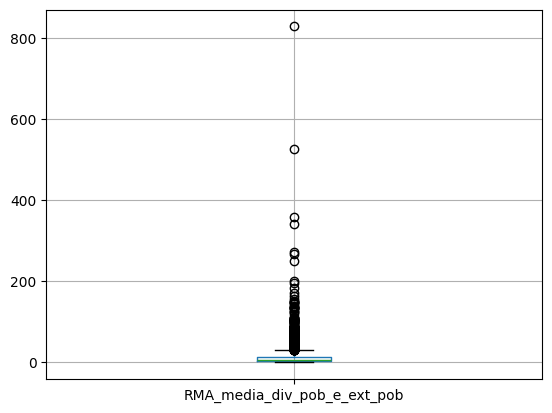

In [65]:
dados[['RMA_media_div_pob_e_ext_pob']].boxplot()


In [66]:
indice_max = dados['RMA_media_div_pob_e_ext_pob'].idxmax()
linha_max = dados['RMA_media_div_pob_e_ext_pob'].loc[indice_max]
linha_max

827.6562500000001

In [67]:
maiores_valores = dados['RMA_media_div_pob_e_ext_pob'].nlargest(5)
menores_valores = dados['RMA_media_div_pob_e_ext_pob'].nsmallest(5)

In [68]:
maiores_valores

5098    827.656250
4988    525.000000
4720    357.297297
5022    340.612245
5059    272.000000
Name: RMA_media_div_pob_e_ext_pob, dtype: float64

In [69]:
menores_valores

575     0.0
605     0.0
701     0.0
739     0.0
1031    0.0
Name: RMA_media_div_pob_e_ext_pob, dtype: float64

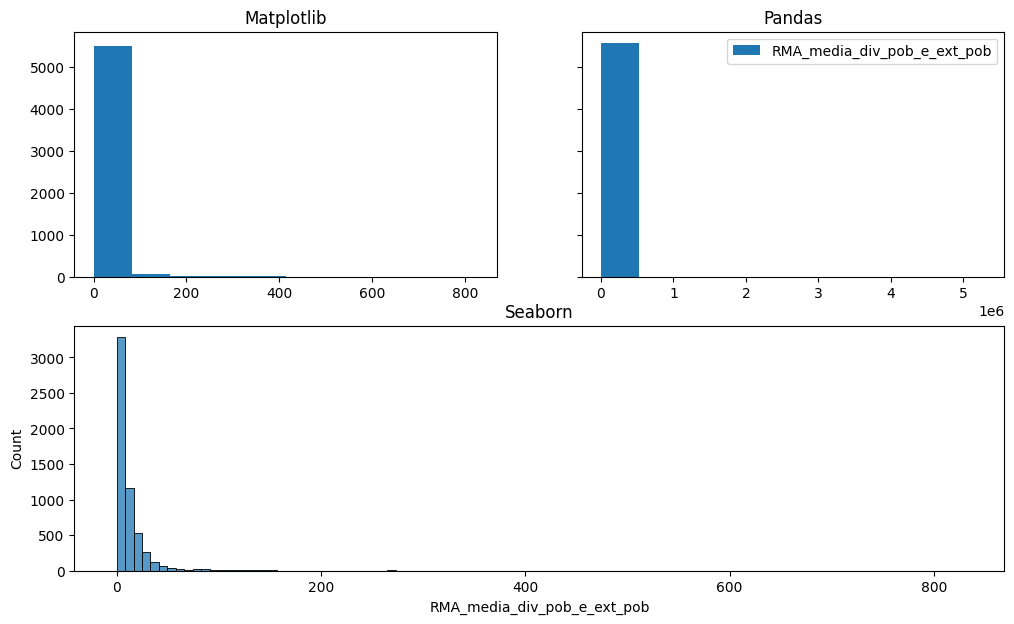

In [70]:
fig = plt.figure(figsize=(12,7))

ax1 = plt.subplot(2, 2, 1)
ax1.set_title('Matplotlib')
ax1.hist(x=dados['RMA_media_div_pob_e_ext_pob']);

ax2 = plt.subplot(2, 2, 2, sharey=ax1)
ax2.set_title('Pandas')
dados.plot.hist(column='RMA_media_div_pob_e_ext_pob', bins=10, ax=ax2);

ax3 = plt.subplot(2, 1, 2)
plt.title('Seaborn')

sns.histplot(data=dados, x='RMA_media_div_pob_e_ext_pob', 
             multiple='stack', bins=100, ax=ax3);
             

In [71]:
dados['indice'] = pd.cut(dados['RMA_media_div_pob_e_ext_pob'], bins = [-1, 0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 850])

In [72]:
indice_11c = dados['indice'].value_counts()
indice_11c = pd.DataFrame(indice_11c).sort_values(by='indice')
indice_11c 

,count
indice,
"(-1, 0]",69
"(0, 5]",2324
"(5, 10]",1232
"(10, 15]",673
"(15, 20]",431
"(20, 25]",242
"(25, 30]",170
"(30, 35]",120
"(35, 40]",61


In [73]:
df_indice_RMA = indice_11c.reset_index(drop=False).copy()
df_indice_RMA

,indice,count
0,"(-1, 0]",69
1,"(0, 5]",2324
2,"(5, 10]",1232
3,"(10, 15]",673
4,"(15, 20]",431
5,"(20, 25]",242
6,"(25, 30]",170
7,"(30, 35]",120
8,"(35, 40]",61
9,"(40, 45]",59


In [74]:
df_indice_RMA['Classe'] = [0,1,2,3,4,5,6,7,8,9,10,11]
df_indice_RMA

,indice,count,Classe
0,"(-1, 0]",69,0
1,"(0, 5]",2324,1
2,"(5, 10]",1232,2
3,"(10, 15]",673,3
4,"(15, 20]",431,4
5,"(20, 25]",242,5
6,"(25, 30]",170,6
7,"(30, 35]",120,7
8,"(35, 40]",61,8
9,"(40, 45]",59,9


C:\Users\aline\AppData\Local\Temp\ipykernel_12192\3422903767.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['0','0','5-10','15-20','25-30','35-40','45-50'],


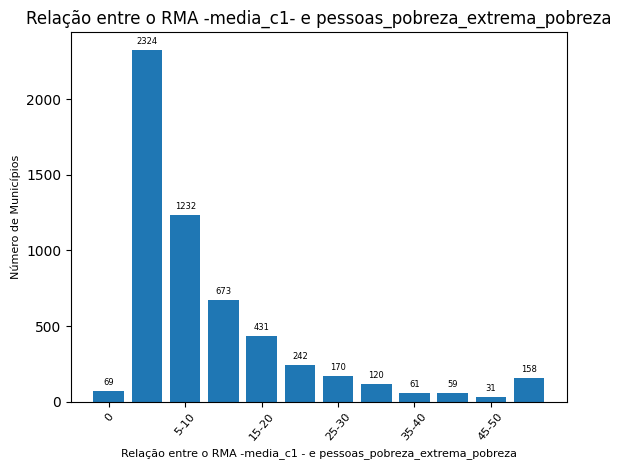

In [75]:
fig10c, ax = plt.subplots()

X = df_indice_RMA['Classe']
Y = df_indice_RMA['count']
bars = ax.bar(X, Y)

plt.title('Relação entre o RMA -media_c1- e pessoas_pobreza_extrema_pobreza')

ax.set_xlabel('Relação entre o RMA -media_c1 - e pessoas_pobreza_extrema_pobreza', fontsize=8)
ax.set_ylabel('Número de Municípios', fontsize=8)

ax.set_xticklabels(['0','0','5-10','15-20','25-30','35-40','45-50'],
                   rotation=90, fontsize=6)

# Adicione etiquetas em todas as barras
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # Deslocamento vertical das etiquetas
                textcoords="offset points",
                ha='center', va='bottom', fontsize=6
               )
plt.xticks(rotation=50, fontsize=8)

plt.show()


In [76]:
dados.sort_values(by='Dez_tot_pes_pob_e_ext_pob')[:5]

,ibge_6,ibge_7,Município,total_max_cras,soma_c1,media_c1,Dez_tot_pes_pob_e_ext_pob,RMA_media_div_pob_e_ext_pob,indice
4988,431805,4318051.0,São Domingos do Sul,1.0,462.0,42.0,8,525.000000,"(50, 850]"
5060,432163,4321634.0,Três Arroios,1.0,329.0,27.4,15,182.666667,"(50, 850]"
4861,431235,4312351.0,Montauri,1.0,257.0,21.4,20,107.000000,"(50, 850]"
4767,430786,4307864.0,Fagundes Varela,1.0,304.0,25.3,24,105.416667,"(50, 850]"
4927,431475,4314753.0,Poço das Antas,1.0,600.0,50.0,25,200.000000,"(50, 850]"


In [77]:
dados[(dados['ibge_7']==5300108) | (dados['ibge_7']==1100015)]

,ibge_6,ibge_7,Município,total_max_cras,soma_c1,media_c1,Dez_tot_pes_pob_e_ext_pob,RMA_media_div_pob_e_ext_pob,indice
0,110001,1100015.0,Alta Floresta D'Oeste,1.0,14165.0,1180.4,5508,21.430646,"(20, 25]"
5569,530010,5300108.0,Brasília,29.0,300262.0,27296.5,500738,5.451254,"(5, 10]"


inserir classe na tabela

In [78]:
dadosRMA=pd.merge(dados,df_indice_RMA, how='inner')
dadosRMA=dadosRMA.drop(columns={'count'}).rename(columns={'indice':'faixa'})
dadosRMA.sort_values(by='RMA_media_div_pob_e_ext_pob')[-2:]

,ibge_6,ibge_7,Município,total_max_cras,soma_c1,media_c1,Dez_tot_pes_pob_e_ext_pob,RMA_media_div_pob_e_ext_pob,faixa,Classe
5210,431805,4318051.0,São Domingos do Sul,1.0,462.0,42.0,8,525.00000,"(50, 850]",11
5225,432360,4323606.0,Vista Alegre do Prata,1.0,6356.0,529.7,64,827.65625,"(50, 850]",11


Arquivo para construção do indice

In [79]:
dadosRMA.to_csv('data/IndiceGeral/dadosRMA_indice.csv',encoding = 'UTF-8')

In [80]:
georreferenciamento_df = pd.read_csv('https://raw.githubusercontent.com/kelvins/Municipios-Brasileiros/main/csv/municipios.csv')

#os dados de georreferenciamento tem 7 dígitos (vamos remover o dígito verificador e atualizar o dataframe)
georreferenciamento_df['codigo_ibge'] = georreferenciamento_df['codigo_ibge'].astype('str').map(lambda x: x[:-1]).astype('int')


In [81]:
#cruzamento do dataframe resultados com as informações de georreferenciamento
pd_indiceRMA_geo = pd.merge(dadosRMA[['ibge_6','RMA_media_div_pob_e_ext_pob','Classe']],
                         georreferenciamento_df[['codigo_ibge', 'nome', 'latitude', 'longitude']],
                         left_on='ibge_6',
                         right_on='codigo_ibge',
                         how='inner')

In [82]:
pd_indiceRMA_geo.head(2)

,ibge_6,RMA_media_div_pob_e_ext_pob,Classe,codigo_ibge,nome,latitude,longitude
0,110001,21.430646,5,110001,Alta Floresta D'Oeste,-11.9283,-61.9953
1,110007,24.524766,5,110007,Corumbiara,-12.9551,-60.8947


In [83]:
import requests
geojson = requests.get(f'http://servicodados.ibge.gov.br/api/v3/malhas/paises/BR?formato=application/vnd.geo+json&qualidade=minima&intrarregiao=municipio').json()


In [84]:
#a malha geográfica do ibge tem 7 dígitos (vamos remover o dígito verificador e atualizar a malha)
from geojson_rewind import rewind
for feature in geojson['features']:
    feature['properties']['codarea'] = feature['properties']['codarea'][:-1]
geojson = rewind(geojson, rfc7946=False)

In [85]:
#construir o mapa choroplético com timeline no campo de ano
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'iframe'

fig = px.choropleth(pd_indiceRMA_geo,
                    geojson=geojson,
                    scope='south america',
                    color='Classe',
                    color_continuous_scale="Reds",
                    locations='codigo_ibge',
                    featureidkey='properties.codarea',
                    hover_name='nome').update_layout(height=800, width=1000, autosize=False)

fig.update_traces(marker_line_width=0)

fig.show()

arquivo para streamlit

In [86]:
regioes = pd.read_json('data\municipios-poligonos.json')#este arquivo foi utilizado para relacionar o código IBGE com os estados e regiõ

In [87]:
regioes['ibge_6'] = regioes['municipioCodigo'].apply(lambda x: int(str(x)[:6]))

In [88]:
regioes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5567 entries, 0 to 5566
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   _id                       5567 non-null   object
 1   ufCodigo                  5567 non-null   int64 
 2   ufNome                    5567 non-null   object
 3   ufSigla                   5567 non-null   object
 4   mesorregiaoCodigo         5567 non-null   int64 
 5   mesorregiaoNome           5567 non-null   object
 6   microrregiaoCodigo        5567 non-null   int64 
 7   microrregiaoNome          5567 non-null   object
 8   municipioCodigo           5567 non-null   int64 
 9   municipioCodigoAbreviado  5567 non-null   int64 
 10  municipioNome             5567 non-null   object
 11  poligono                  5567 non-null   object
 12  kmlBrasil                 5567 non-null   object
 13  ibge_6                    5567 non-null   int64 
dtypes: int64(6), object(8)
m

In [89]:
regioes_limpa = regioes.drop(['_id','mesorregiaoCodigo','mesorregiaoNome','microrregiaoCodigo','microrregiaoNome','municipioCodigo','municipioCodigoAbreviado','municipioNome', 'kmlBrasil'], axis=1)

In [90]:
df_RMA_completa = pd.merge(dadosRMA,regioes_limpa, how='left')

In [91]:
df_RMA_completa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   ibge_6                       5570 non-null   int64   
 1   ibge_7                       5570 non-null   float64 
 2   Município                    5570 non-null   object  
 3   total_max_cras               5570 non-null   float64 
 4   soma_c1                      5570 non-null   float64 
 5   media_c1                     5570 non-null   float64 
 6   Dez_tot_pes_pob_e_ext_pob    5570 non-null   int64   
 7   RMA_media_div_pob_e_ext_pob  5570 non-null   float64 
 8   faixa                        5570 non-null   category
 9   Classe                       5570 non-null   int64   
 10  ufCodigo                     5567 non-null   float64 
 11  ufNome                       5567 non-null   object  
 12  ufSigla                      5567 non-null   object  
 13  pol

In [92]:
df_RMA_completa[df_RMA_completa['ufCodigo'].isna()]

,ibge_6,ibge_7,Município,total_max_cras,soma_c1,media_c1,Dez_tot_pes_pob_e_ext_pob,RMA_media_div_pob_e_ext_pob,faixa,Classe,ufCodigo,ufNome,ufSigla,poligono
2692,240020,2400208.0,Açu,2.0,4471.0,372.6,26443,1.409069,"(0, 5]",1,NaN,NaN,NaN,NaN
2703,240130,2401305.0,Augusto Severo,1.0,209.0,17.4,6610,0.263238,"(0, 5]",1,NaN,NaN,NaN,NaN
2742,240530,2405306.0,Januário Cicco,1.0,337.0,28.1,5298,0.530389,"(0, 5]",1,NaN,NaN,NaN,NaN


In [93]:
df_RMA_completa['ufCodigo'] = df_RMA_completa['ufCodigo'].fillna(24)
df_RMA_completa['ufNome'] = df_RMA_completa['ufNome'].fillna('Rio Grande do Norte')
df_RMA_completa['ufSigla'] = df_RMA_completa['ufSigla'].fillna('RN')
df_RMA_completa['ufCodigo'] = df_RMA_completa['ufCodigo'].astype(str)


In [94]:
df_RMA_completa.head(2)

,ibge_6,ibge_7,Município,total_max_cras,soma_c1,media_c1,Dez_tot_pes_pob_e_ext_pob,RMA_media_div_pob_e_ext_pob,faixa,Classe,ufCodigo,ufNome,ufSigla,poligono
0,110001,1100015.0,Alta Floresta D'Oeste,1.0,14165.0,1180.4,5508,21.430646,"(20, 25]",5,11.0,Rondônia,RO,"{'type': 'MultiPolygon', 'coordinates': [[[[-6..."
1,110007,1100072.0,Corumbiara,1.0,4397.0,366.4,1494,24.524766,"(20, 25]",5,11.0,Rondônia,RO,"{'type': 'MultiPolygon', 'coordinates': [[[[-6..."


In [95]:
df_RMA_completa['Município_UF'] = df_RMA_completa.apply(lambda row:f'{row["Município"]} - {row["ufSigla"]}', axis=1)

In [96]:
def categorize_uf_code(code):
    if code.startswith('1'):
        return 'Norte'
    elif code.startswith('2'):
        return 'Nordeste'
    elif code.startswith('3'):
        return 'Sudeste'
    elif code.startswith('4'):
        return 'Sul'
    else:
        return 'Centro-Oeste'
df_RMA_completa['Região'] = df_RMA_completa['ufCodigo'].apply(categorize_uf_code)

In [97]:
df_RMA_completa.head(2)

,ibge_6,ibge_7,Município,total_max_cras,soma_c1,media_c1,Dez_tot_pes_pob_e_ext_pob,RMA_media_div_pob_e_ext_pob,faixa,Classe,ufCodigo,ufNome,ufSigla,poligono,Município_UF,Região
0,110001,1100015.0,Alta Floresta D'Oeste,1.0,14165.0,1180.4,5508,21.430646,"(20, 25]",5,11.0,Rondônia,RO,"{'type': 'MultiPolygon', 'coordinates': [[[[-6...",Alta Floresta D'Oeste - RO,Norte
1,110007,1100072.0,Corumbiara,1.0,4397.0,366.4,1494,24.524766,"(20, 25]",5,11.0,Rondônia,RO,"{'type': 'MultiPolygon', 'coordinates': [[[[-6...",Corumbiara - RO,Norte


In [98]:
df_RMA_completa.to_csv('Streamlit/data/df_RMA_completa.csv',encoding = 'UTF-8')